### *"The way to get started is to quit talking and begin doing."*  -Walt Disney

----

## YOUR NAME HERE:  Daniel DeLuca

----

In [1]:
#What 2 packages do you need to import here?
import numpy as np
import pandas as pd

Let's load in the nba data again.

In [5]:
#Run this cell to load in the data set
nba = pd.read_csv('nba_salaries.csv')
nba = nba.rename(columns={"15-16 SALARY":'SALARY'})  #RENAMING THE COLUMN NAME FOR EASE
nba

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...,...
412,Gary Neal,PG,Washington Wizards,2.139000
413,DeJuan Blair,C,Washington Wizards,2.000000
414,Kelly Oubre Jr.,SF,Washington Wizards,1.920240
415,Garrett Temple,SG,Washington Wizards,1.100602


# Selecting Rows 

Often, we would like to extract just those rows that correspond to entries with a particular feature. For example, we might want only the rows corresponding to the Warriors, or to players who earned more than $\$10$ million. Or we might just want the top five earners.

### Selcting Specific Rows  (Also called Row SLICING)
 
You already know how to select rows basd on location or labels.  You just use `.iloc` or `.loc`!

But let's get a little more practice.  Recall the DataFrame method  `iloc` takes a specified set of rows. It stands for "integer location", as it allows us to select the rows via their position within the data (0th row, 1st row, etc.).  Inside the hard brackets, we pass a row index or a range of indices.  We are then returned the desired subset of rows.  

For example, as you know, if we wanted just the first row of `nba`, we could use `iloc` as follows.

In [6]:
nba.iloc[0]


PLAYER       Paul Millsap
POSITION               PF
TEAM        Atlanta Hawks
SALARY          18.671659
Name: 0, dtype: object

Now, the output is not a pretty table.  This is because only one row is returned.  If that is annoying to you, just use double brackets.  This instead returns a dataframe.  If you're interested in know the details of why a second bracket would have this effect, call me over.

In [7]:
nba.iloc[[0]]

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659


So if we want the second row, we could pass an index of 1.

In [8]:
nba.iloc[[1]]

,PLAYER,POSITION,TEAM,SALARY
1,Al Horford,C,Atlanta Hawks,12.0


We could also get the fourth, fifth, and sixth rows by specifying a range of indices as the argument. 

Note:  This time, multiple rows are selected so the output will look like a table without using double brackets.

In [9]:
nba.iloc[np.arange(3, 6)]

,PLAYER,POSITION,TEAM,SALARY
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
5,Thabo Sefolosha,SF,Atlanta Hawks,4.000000


Or we could use the shortcut notation which is a colon.  

* `nba.iloc[np.arange(3, 6)]` is the same as `nba.iloc[3:6]`.  **NOTICE: BOTH STOP AT ROW 5!**

Check out the examples below.

In [10]:
nba.iloc[3:6]  #returns 3,4,5 but not 6

,PLAYER,POSITION,TEAM,SALARY
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
5,Thabo Sefolosha,SF,Atlanta Hawks,4.000000


In [11]:
#You can leave the second blank, in which case, up till the end is selected.

nba.iloc[410:]  #selects 410 till the end which is row 416 (Since there are 417 rows)

,PLAYER,POSITION,TEAM,SALARY
410,Drew Gooden,PF,Washington Wizards,3.300000
411,Ramon Sessions,PG,Washington Wizards,2.170465
412,Gary Neal,PG,Washington Wizards,2.139000
413,DeJuan Blair,C,Washington Wizards,2.000000
414,Kelly Oubre Jr.,SF,Washington Wizards,1.920240
415,Garrett Temple,SG,Washington Wizards,1.100602
416,Jarell Eddie,SG,Washington Wizards,0.561716


In [12]:
#You can leave the first spot blank, in which case, the selection starts at the initial row.

nba.iloc[:5]  #selects the 0th-4th row

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479


Add if we add a 3rd posiion, we can "skip" by every $xth$ row, like below.

In [13]:
#Get every 5th row, beginning to end.
nba.iloc[::5]  #Leave the first 2 blank to from the start to end

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
5,Thabo Sefolosha,SF,Atlanta Hawks,4.000000
10,Walter Tavares,C,Atlanta Hawks,1.000000
15,Isaiah Thomas,PG,Boston Celtics,6.912869
20,Tyler Zeller,C,Boston Celtics,2.616975
...,...,...,...,...
395,Grant Jerrett,PF,Utah Jazz,0.947276
400,John Wall,PG,Washington Wizards,15.851950
405,Martell Webster,SF,Washington Wizards,5.613500
410,Drew Gooden,PF,Washington Wizards,3.300000


If we want a table of the top 5 highest paid players, we can first sort the list by salary and then `iloc` the first five rows:

In [14]:
nba.sort_values('SALARY', ascending=False).iloc[0:5]

,PLAYER,POSITION,TEAM,SALARY
169,Kobe Bryant,SF,Los Angeles Lakers,25.000000
29,Joe Johnson,SF,Brooklyn Nets,24.894863
72,LeBron James,SF,Cleveland Cavaliers,22.970500
255,Carmelo Anthony,SF,New York Knicks,22.875000
131,Dwight Howard,C,Houston Rockets,22.359364


Or if you prefer, you could do the same thing in 2 steps.

In [15]:
nba_descending = nba.sort_values('SALARY', ascending=False)
nba_descending.iloc[0:5]

,PLAYER,POSITION,TEAM,SALARY
169,Kobe Bryant,SF,Los Angeles Lakers,25.000000
29,Joe Johnson,SF,Brooklyn Nets,24.894863
72,LeBron James,SF,Cleveland Cavaliers,22.970500
255,Carmelo Anthony,SF,New York Knicks,22.875000
131,Dwight Howard,C,Houston Rockets,22.359364


So don't forget you have 2 options for row slicing:  see the cells below.

In [16]:
nba.iloc[20:41:4]   

,PLAYER,POSITION,TEAM,SALARY
20,Tyler Zeller,C,Boston Celtics,2.616975
24,Terry Rozier,PG,Boston Celtics,1.824360
28,R.J. Hunter,SG,Boston Celtics,1.148640
32,Bojan Bogdanovic,SG,Brooklyn Nets,3.425510
36,Andrea Bargnani,C,Brooklyn Nets,1.362897
40,Thomas Robinson,PF,Brooklyn Nets,0.981348


In [17]:
#same as above
nba.iloc[np.arange(20,41, 4)]


,PLAYER,POSITION,TEAM,SALARY
20,Tyler Zeller,C,Boston Celtics,2.616975
24,Terry Rozier,PG,Boston Celtics,1.824360
28,R.J. Hunter,SG,Boston Celtics,1.148640
32,Bojan Bogdanovic,SG,Brooklyn Nets,3.425510
36,Andrea Bargnani,C,Brooklyn Nets,1.362897
40,Thomas Robinson,PF,Brooklyn Nets,0.981348


---

# Question 1

a) Now you try.  Using sorting plus iloc to find a table with the 7 Lowest paid players.

In [18]:
nba.sort_values("SALARY", ascending = True).iloc[0:7]

,PLAYER,POSITION,TEAM,SALARY
267,Thanasis Antetokounmpo,SF,New York Knicks,0.030888
327,Cory Jefferson,PF,Phoenix Suns,0.049709
326,Jordan McRae,SG,Phoenix Suns,0.049709
324,Orlando Johnson,SG,Phoenix Suns,0.055722
325,Phil Pressey,PG,Phoenix Suns,0.055722
200,Elliot Williams,SG,Memphis Grizzlies,0.055722
297,Keith Appling,PG,Orlando Magic,0.061776


b)   Use iloc to get every other row from the original nba table.

In [19]:
nba.iloc[np.arange(0,416,2)]

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
2,Tiago Splitter,C,Atlanta Hawks,9.756250
4,Kyle Korver,SG,Atlanta Hawks,5.746479
6,Mike Scott,PF,Atlanta Hawks,3.333333
8,Dennis Schroder,PG,Atlanta Hawks,1.763400
...,...,...,...,...
406,Otto Porter Jr.,SF,Washington Wizards,4.662960
408,Jared Dudley,SF,Washington Wizards,4.375000
410,Drew Gooden,PF,Washington Wizards,3.300000
412,Gary Neal,PG,Washington Wizards,2.139000


---

### Rows Corresponding to a Specified Feature

In the previous section, we selected rows by index via `iloc`.  Much more often, we will want to access data in a set of rows that have a certain feature, but whose indices we don't know ahead of time. For example, we might want data on all the players who made more than $\$10$ million, but we don't want to spend time counting rows in the sorted table.

We will use *Boolean Indexing* to do this, as we discussed in class.

* First, we make a selection criteria.  Sometimes this is called the ``where`` criteria beacuse we are selecting rows of the table *where* a certain feature occurs.  

* Then we place the selection criteria within hard brackets so as to select the desired rows.  The output will be a subset of the table with the same columns as the original but with only those rows *where* the feature occurs.

Let's try it.

Say the feature we want is "made more than $\$10$ million".  We need to use the `SALARY` column to determine this.  So our selection criteria in code-lish (code merged with English) is:

``Select all rows where nba["SALARY"] > 10.``

### TASK TO COMPLETE:

So our selection criteria should be ``nba["SALARY"] > 10``.  Here's how we use the selection criteria to extract the data for all those who earned more than $\$10$ million.

In [20]:
#Replace the elipsis with: nba["SALARY"] > 10
where_salary_over_10  = (nba["SALARY"] > 10)
nba[where_salary_over_10 ]

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
29,Joe Johnson,SF,Brooklyn Nets,24.894863
30,Thaddeus Young,PF,Brooklyn Nets,11.235955
42,Al Jefferson,C,Charlotte Hornets,13.500000
...,...,...,...,...
368,DeMar DeRozan,SG,Toronto Raptors,10.050000
383,Gordon Hayward,SF,Utah Jazz,15.409570
400,John Wall,PG,Washington Wizards,15.851950
401,Nene Hilario,C,Washington Wizards,13.000000


The use of the criteria`nba["SALARY"] > 10` ensured that each selected row had a value of `SALARY` that was greater than 10.

Finally, some of you may prefer to do this with no variable name for the selection criteria at all.

In [21]:
nba[nba["SALARY"] > 10]  

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
29,Joe Johnson,SF,Brooklyn Nets,24.894863
30,Thaddeus Young,PF,Brooklyn Nets,11.235955
42,Al Jefferson,C,Charlotte Hornets,13.500000
...,...,...,...,...
368,DeMar DeRozan,SG,Toronto Raptors,10.050000
383,Gordon Hayward,SF,Utah Jazz,15.409570
400,John Wall,PG,Washington Wizards,15.851950
401,Nene Hilario,C,Washington Wizards,13.000000


There are 69 rows in the new table, corresponding to the 69 players who made more than $10$ million dollars. Arranging these rows in order makes the data easier to analyze. DeMar DeRozan of the Toronto Raptors was the "poorest" of this group, at a salary of just over $10$ million dollars.

In [22]:
nba[where_salary_over_10].sort_values('SALARY')

,PLAYER,POSITION,TEAM,SALARY
368,DeMar DeRozan,SG,Toronto Raptors,10.050000
298,Gerald Wallace,SF,Philadelphia 76ers,10.105855
204,Luol Deng,SF,Miami Heat,10.151612
144,Monta Ellis,SG,Indiana Pacers,10.300000
95,Wilson Chandler,SF,Denver Nuggets,10.449438
...,...,...,...,...
131,Dwight Howard,C,Houston Rockets,22.359364
255,Carmelo Anthony,SF,New York Knicks,22.875000
72,LeBron James,SF,Cleveland Cavaliers,22.970500
29,Joe Johnson,SF,Brooklyn Nets,24.894863


### TASK TO COMPLETE:

How much did Stephen Curry make? For the answer, we have to access the row where the value of `PLAYER` is equal to `Stephen Curry`. That is placed a table consisting of just one line:

In [23]:
#Please replace the ellipsis with: nba["PLAYER"] == 'Stephen Curry'
where_curry = (nba["PLAYER"] == 'Stephen Curry')
nba[where_curry]

,PLAYER,POSITION,TEAM,SALARY
121,Stephen Curry,PG,Golden State Warriors,11.370786


Curry made just under $\$11.4$ million dollars. That's a lot of money, but it's less than half the salary of LeBron James. You'll find that salary in the "Top 5" table earlier in this section, or you could find it replacing `'Stephen Curry'` by `'LeBron James'` in the line of code above.

### TASK TO COMPLETE:

Let's get a table of everyone who plays for the Warriors.  Now the important column is "TEAM".

In [24]:
#Replace the ellipsis with: nba["TEAM"] == "Golden State Warriors"
where_warriors = (nba["TEAM"] == 'Golden State Warriors')
nba[where_warriors]

,PLAYER,POSITION,TEAM,SALARY
117,Klay Thompson,SG,Golden State Warriors,15.501000
118,Draymond Green,PF,Golden State Warriors,14.260870
119,Andrew Bogut,C,Golden State Warriors,13.800000
120,Andre Iguodala,SF,Golden State Warriors,11.710456
121,Stephen Curry,PG,Golden State Warriors,11.370786
122,Jason Thompson,PF,Golden State Warriors,7.008475
123,Shaun Livingston,PG,Golden State Warriors,5.543725
124,Harrison Barnes,SF,Golden State Warriors,3.873398
125,Marreese Speights,C,Golden State Warriors,3.815000
126,Leandro Barbosa,SG,Golden State Warriors,2.500000


---

# Question 2

We can find the average salary of the Warriors by requesting the mean salary of this subtable.  Below, I start you off with the wrong code and then ask you to correct it.

In [25]:
#This code gives you the mean of any columns with numbers in it. 
#Run it and analyze it!  
nba[where_warriors].mean()

C:\Users\dande\AppData\Local\Temp/ipykernel_11468/4046550460.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nba[where_warriors].mean()


SALARY    6.720367
dtype: float64

Even though you can get the mean of all columns in the table at once, you can just directly get the mean of the exact column that you want.  Let's do that now.

In [26]:
#Fill in the ellipsis below
nba[where_warriors]["SALARY"].mean()

6.720366928571429

---

Let's get some more practice!

---

# Question 3

Select all rows of the Denver Nuggets players.

In [27]:
#First set up the selection criteria
where_nuggets = (nba['TEAM'] == 'Denver Nuggets')

#Now do the selection
nba[where_nuggets]

,PLAYER,POSITION,TEAM,SALARY
93,Danilo Gallinari,SF,Denver Nuggets,14.000000
94,Kenneth Faried,PF,Denver Nuggets,11.235955
95,Wilson Chandler,SF,Denver Nuggets,10.449438
96,JJ Hickson,C,Denver Nuggets,5.613500
97,Jameer Nelson,PG,Denver Nuggets,4.345000
98,Will Barton,SF,Denver Nuggets,3.533333
99,Emmanuel Mudiay,PG,Denver Nuggets,3.102240
100,Darrell Arthur,PF,Denver Nuggets,2.814000
101,Jusuf Nurkic,C,Denver Nuggets,1.842000
102,Joffrey Lauvergne,C,Denver Nuggets,1.709719


Now find the average salary of the Nuggets.  

In [26]:
#Find the average salary of the Nuggets here.
avg_salary_nuggets = nba[where_nuggets]["SALARY"].mean()
avg_salary_nuggets

4.459243142857143

---

### Saving our Subtables ###

Many times when we select rows from a table, we create a variable to store the subtable.

For example, below is code that creates a subtable that contains only the warrior rows.

In [28]:
#Here we save our subtable into a variable name
warriors = nba[where_warriors]
warriors

,PLAYER,POSITION,TEAM,SALARY
117,Klay Thompson,SG,Golden State Warriors,15.501000
118,Draymond Green,PF,Golden State Warriors,14.260870
119,Andrew Bogut,C,Golden State Warriors,13.800000
120,Andre Iguodala,SF,Golden State Warriors,11.710456
121,Stephen Curry,PG,Golden State Warriors,11.370786
122,Jason Thompson,PF,Golden State Warriors,7.008475
123,Shaun Livingston,PG,Golden State Warriors,5.543725
124,Harrison Barnes,SF,Golden State Warriors,3.873398
125,Marreese Speights,C,Golden State Warriors,3.815000
126,Leandro Barbosa,SG,Golden State Warriors,2.500000


And now we can manipulate that subtable with the commands we know. For example, the code below finds the max salary of any Warrior.


### TASK TO COMPLETE:

In [32]:
#Replace the ellipsis with .max().  Then max_salary_warriors should be set to 15.501 million.
max_salary_warriors = warriors["SALARY"].max()
max_salary_warriors

15.501

---

# Question 4

Using the ``warriors`` subtable, plus ``sort_values`` and ``.iloc``, set the ```warrior_with_min_sal``` to the name of the lowest paid warrior.

**So do not hardcode.**

In [35]:
warrior_with_min_sal = warriors.sort_values("SALARY").iloc[0]
warrior_with_min_sal

PLAYER           Anderson Varejao
POSITION                       PF
TEAM        Golden State Warriors
SALARY                   0.289755
Name: 130, dtype: object

NOTE: The variable ``warrior_with_min_sal`` will be Anderson Varejao if you do this correctly.

---

### Finding Standard Deviation of a Variable/Column ###

We spent a lot of time discussing the standard deviation spread of a data set, ie, the standard deviation of a data set.

The function for finding the standard deviation of a data set is ```std()```.  

The syntax for it is just like that of mean:  ```table["Column Name"].std()```

# Question 5

A)  Save the subtable with only the Denver Nuggets rows into a variable called ``nuggets``.

In [47]:
nuggets = nba["TEAM"] == 'Denver Nuggets'
nuggets = nba[nuggets]
nuggets

,PLAYER,POSITION,TEAM,SALARY
93,Danilo Gallinari,SF,Denver Nuggets,14.000000
94,Kenneth Faried,PF,Denver Nuggets,11.235955
95,Wilson Chandler,SF,Denver Nuggets,10.449438
96,JJ Hickson,C,Denver Nuggets,5.613500
97,Jameer Nelson,PG,Denver Nuggets,4.345000
98,Will Barton,SF,Denver Nuggets,3.533333
99,Emmanuel Mudiay,PG,Denver Nuggets,3.102240
100,Darrell Arthur,PF,Denver Nuggets,2.814000
101,Jusuf Nurkic,C,Denver Nuggets,1.842000
102,Joffrey Lauvergne,C,Denver Nuggets,1.709719


B) Now find the standard deviation of the Warriors\' salaries and the Narriors\' salaries.

In [50]:
warriors_std = warriors ["SALARY"].std()
nuggets_std = nuggets["SALARY"].std()

warriors_std, nuggets_std

(5.483619524504139, 4.337971552783146)

C)  Which team has more variablity amongst the salaries of its players?

Warriors

---


### Multiple Features ###
You can access rows that have multiple specified features, by using `&` (and) as well as `|` (or) in your selection criteria. 

For example, here is a way to extract all the Point Guards whose salaries were over $\$15$ million.

In [52]:
where_pg_and_over_15 = (nba["SALARY"] > 15) & (nba["POSITION"] == "PG")
nba[where_pg_and_over_15]

,PLAYER,POSITION,TEAM,SALARY
60,Derrick Rose,PG,Chicago Bulls,20.093064
74,Kyrie Irving,PG,Cleveland Cavaliers,16.407501
156,Chris Paul,PG,Los Angeles Clippers,21.468695
269,Russell Westbrook,PG,Oklahoma City Thunder,16.744218
400,John Wall,PG,Washington Wizards,15.851950


Optionally, you can just select in multiple steps by first getting all players whose salary is larger than 15, and from those rows, by then getting all point guards.

In [53]:
#First get a subtable of all high salaries
where_over_15 = (nba["SALARY"] > 15) 
nba_over_15 = nba[where_over_15]

#From these high salaries, get the point guards
where_pg = (nba_over_15["POSITION"] == "PG")
nba_over_15[where_pg]

,PLAYER,POSITION,TEAM,SALARY
60,Derrick Rose,PG,Chicago Bulls,20.093064
74,Kyrie Irving,PG,Cleveland Cavaliers,16.407501
156,Chris Paul,PG,Los Angeles Clippers,21.468695
269,Russell Westbrook,PG,Oklahoma City Thunder,16.744218
400,John Wall,PG,Washington Wizards,15.851950


Or if you love doing things in one line:

In [54]:
nba[(nba["SALARY"] > 15) & (nba["POSITION"] == "PG")]  #You need the parentheses, annoyingly enough

,PLAYER,POSITION,TEAM,SALARY
60,Derrick Rose,PG,Chicago Bulls,20.093064
74,Kyrie Irving,PG,Cleveland Cavaliers,16.407501
156,Chris Paul,PG,Los Angeles Clippers,21.468695
269,Russell Westbrook,PG,Oklahoma City Thunder,16.744218
400,John Wall,PG,Washington Wizards,15.851950


Annoyingly, without the parentheses we would have gotten an error.  

### So put parentheses whenever you're creating these compound statements.

In [ ]:
nba[nba["SALARY"] > 15 & nba["POSITION"] == "PG"] 

### SELECTING "IN-BETWEEN"

This logic allows you to select in between ranges as well.  

Below we select all players whose salary is at least 10 but strictly less than 10.3.  So anyone who makes exactly 10.3 is not in the returned table.

In [56]:
where_early_10s = (nba["SALARY"]  >= 10.0) & (nba["SALARY"]  < 10.3) 
nba[where_early_10s]

,PLAYER,POSITION,TEAM,SALARY
204,Luol Deng,SF,Miami Heat,10.151612
298,Gerald Wallace,SF,Philadelphia 76ers,10.105855
356,Danny Green,SG,San Antonio Spurs,10.000000
368,DeMar DeRozan,SG,Toronto Raptors,10.050000


---

# Question 6

a) Find all centers ('C') on the 76ers.

In [69]:
ers = (nba["TEAM"] == 'Philadelphia 76ers') & (nba['POSITION'] == 'C')
seventy = nba[ers]
seventy

,PLAYER,POSITION,TEAM,SALARY
300,Joel Embiid,C,Philadelphia 76ers,4.62696
301,Jahlil Okafor,C,Philadelphia 76ers,4.58268


b) Find the point guard who makes the most on the Utah Jazz team.
    
If done correctly, the answer is: 386	Dante Exum	PG	Utah Jazz	3.777720
    
    

In [81]:
Jazz = nba[(nba['TEAM'] == 'Utah Jazz') & (nba['POSITION'] == 'PG')]

nba[nba["SALARY"] == Jazz["SALARY"].max()]

,PLAYER,POSITION,TEAM,SALARY
386,Dante Exum,PG,Utah Jazz,3.77772


c) Using ONE where clause, find out how many players were a point guard or a center in 2015. 

HINT:  You need to do this in TWO steps.  Perform the selection.  Then get the length.

Double click *here* to see the anwer.

<!-- The answer is 154 if you do this correctly.-->

In [91]:
Pg_2015 = nba[(nba['POSITION'] == 'PG') | (nba['POSITION'] == 'C')]
len(Pg_2015)

154

d) Write code to find all positions in the table.  Each position should only be listed once.  

HINT:  You don't need boolean indexing to do this.
    

In [93]:
nba['POSITION'].unique()

array(['PF', 'C', 'PG', 'SG', 'SF'], dtype=object)

- - - - - - - - - - - - - - - - - - - - - - - - - - -

It is not unusual to want a row that has one of  many values.  So for example, you just picked rows that have point guards or centers.

But what if you wanted to know a much longer list, like which players were a forward, a point guard, a center or a power forward.

You could do it in a very long way, like this!

In [94]:
where_positions = (nba["POSITION"]  == "PG") | (nba["POSITION"]  == "F") | (nba["POSITION"]  == "C") | (nba["POSITION"]  == "PF")
nba[where_positions]

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
6,Mike Scott,PF,Atlanta Hawks,3.333333
...,...,...,...,...
407,Kris Humphries,PF,Washington Wizards,4.440000
410,Drew Gooden,PF,Washington Wizards,3.300000
411,Ramon Sessions,PG,Washington Wizards,2.170465
412,Gary Neal,PG,Washington Wizards,2.139000


But you have to do this so often that pandas provides the `.isin` method.

This function allows you to just give a list of the categories of interest, like below.

THe syntax is : ``df["COLUMN_NAME"].isin([LIST OF THINGS HERE])``

In [95]:
where_positions = nba["POSITION"].isin(["PG", "F", "C", "PF"])
nba[where_positions]

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
6,Mike Scott,PF,Atlanta Hawks,3.333333
...,...,...,...,...
407,Kris Humphries,PF,Washington Wizards,4.440000
410,Drew Gooden,PF,Washington Wizards,3.300000
411,Ramon Sessions,PG,Washington Wizards,2.170465
412,Gary Neal,PG,Washington Wizards,2.139000


---

# Question 7

Select all players on the 76ers, Hawks, or Wizards using the ``isin`` function.

In [105]:
Teams = nba['TEAM'].isin(['Philadelphia 76ers' , 'Atlanta Hawks' , 'Washington Wizards'])
nba[Teams]

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
5,Thabo Sefolosha,SF,Atlanta Hawks,4.000000
6,Mike Scott,PF,Atlanta Hawks,3.333333
7,Kent Bazemore,SF,Atlanta Hawks,2.000000
8,Dennis Schroder,PG,Atlanta Hawks,1.763400
9,Tim Hardaway Jr.,SG,Atlanta Hawks,1.304520


---

### General Form ###

By now you will have realized that the general way to create a selection criteria fits this patten, where the `==` could be another comparison symbol as well ```(<, >, <=, >=)```.

```where_name = (table_name["COLUMN"] == value)```

NOTE:  If we specify a condition that isn't satisfied by any row, we get a table with column labels but no rows.

In [106]:
#First get a subtable of all high salaries
where_obama = (nba["PLAYER"] == "Barack Obama") 
nba[where_obama]

,PLAYER,POSITION,TEAM,SALARY


### Some examples ###

We end the section with a series of examples involving looking for strings.

Each column has a built-in ``str`` variable that comes with many methods that allow for elementwise string operations.

Let's say you just wanted to specify `Warriors` instead of `Golden State Warriors`.  

In [ ]:
where_warriors = (nba["TEAM"].str.contains("Warriors"))
nba[where_warriors ]

You can extract data for all the guards, both Point Guards and Shooting Guards:

In [ ]:
where_guards = (nba["POSITION"].str.contains("G"))
nba[where_guards]

You can get all the players who were not Cleveland Cavaliers and had a salary of no less than $\$20$ million:

In [ ]:
where_other_than_Cavs = (nba['TEAM'] != 'Cleveland Cavaliers') & (nba['SALARY'] >= 20)
nba[where_other_than_Cavs]

The same table can be created in many ways. Here is another, and no doubt you can think of more.

You can even use ``str`` methods to created changes in your strings like below.

In [ ]:
#This code makes all names upper case.
nba["PLAYER"] = nba["PLAYER"].str.upper()
nba

---

# Question 8

List all teams exactly once whose name does not end in an s.

Look this [this website](https://www.tutorialspoint.com/python_pandas/python_pandas_working_with_text_data.htm) for an ``str`` function that could help.   If you do it right, there are 4.

Click here for a **hint**.   

<!-- HINT:  You need to break the request into STEPS.

1) where_end_s Make a where clause to get all teams that end in an s.
2) select by negating the where clause:  ~where_end_s
3) Use unique to get a list of the unique team names
 
-->

In [115]:
nba[nba['TEAM'].str.endswith('s') == False]

,PLAYER,POSITION,TEAM,SALARY
201,Chris Bosh,PF,Miami Heat,22.192730
202,Dwyane Wade,SG,Miami Heat,20.000000
203,Goran Dragic,PG,Miami Heat,14.783000
204,Luol Deng,SF,Miami Heat,10.151612
205,Josh McRoberts,PF,Miami Heat,5.543725
206,Udonis Haslem,PF,Miami Heat,2.854940
207,Justise Winslow,SF,Miami Heat,2.481720
208,Henry Walker,SF,Miami Heat,1.100602
209,Tyler Johnson,SG,Miami Heat,0.845059
210,Greg Whittington,SF,Miami Heat,0.525093


---

# Question 9

Using one where clause, find all power forwards('PF') on teams from a city that starts with 'B' (like Boston Celtics).  Then find their mean salary.

HINT: 
* Use the same website as above to find an `str` function that helps.
* Make sure you put parentheses around each of the conditions you are selcting.

ANS:  You should get 3.9057006000 million.

In [119]:
PF = nba[(nba['POSITION'] == 'PF') & (nba['TEAM'].str.startswith('B'))]
PF['SALARY'].mean()

3.9057006000000003

---


# Question 10

Generate a dataframe with the 3rd/4th/5th highest paid shooting guards in the NBA.  

Your answer should look like this:

|     |        PLAYER | POSITION |                  TEAM |    SALARY |
|----:|--------------:|---------:|----------------------:|----------:|
| 132 |  JAMES HARDEN |       SG |       Houston Rockets | 15.756438 |
| 239 |   ERIC GORDON |       SG |  New Orleans Pelicans | 15.514031 |
| 117 | KLAY THOMPSON |       SG | Golden State Warriors | 15.501000 |

Double **click** here for hints.

<!-- HINTS: 

* Break it down - The steps are:  Select the right rows, sort, then use ``iloc``.

* HINT: ```nba.sort_values(by="TEAM")``` sorts a table BY the team column.  -->


In [139]:
SG = nba[nba["POSITION"] == 'SG']
SG.sort_values('SALARY', ascending = False).iloc[2: 5]

,PLAYER,POSITION,TEAM,SALARY
132,James Harden,SG,Houston Rockets,15.756438
239,Eric Gordon,SG,New Orleans Pelicans,15.514031
117,Klay Thompson,SG,Golden State Warriors,15.501000


---

# Question  11

In 2015-2016, the Cleveland Cavaliers won the finals.  Let's compare their salaries to everyone else's.

A) Set the ``cavs`` variable to be all the rows with  players on the Cleveland Cavaliers.

Set the ``not_cavs`` variable to be all the other rows, ie, the rows with  players NOT on the Cleveland Cavaliers.  You can do this with ``~`` in front of a where clause or just by using a ``!=`` when comparing the team name column to the desired value.

In [140]:
cavs = nba[nba['TEAM'] == 'Cleveland Cavaliers']
cavs

,PLAYER,POSITION,TEAM,SALARY
72,LeBron James,SF,Cleveland Cavaliers,22.970500
73,Kevin Love,PF,Cleveland Cavaliers,19.689000
74,Kyrie Irving,PG,Cleveland Cavaliers,16.407501
75,Tristan Thompson,C,Cleveland Cavaliers,14.260870
76,Brendan Haywood,C,Cleveland Cavaliers,10.522500
77,Iman Shumpert,SG,Cleveland Cavaliers,8.988765
78,Timofey Mozgov,C,Cleveland Cavaliers,4.950000
79,Mo Williams,PG,Cleveland Cavaliers,2.100000
80,Sasha Kaun,C,Cleveland Cavaliers,1.276000
81,Matthew Dellavedova,PG,Cleveland Cavaliers,1.147276


In [155]:
not_cavs = nba[nba['TEAM'] != 'Cleveland Cavaliers']
not_cavs

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...,...
412,Gary Neal,PG,Washington Wizards,2.139000
413,DeJuan Blair,C,Washington Wizards,2.000000
414,Kelly Oubre Jr.,SF,Washington Wizards,1.920240
415,Garrett Temple,SG,Washington Wizards,1.100602


If you did this right, then the lengths of the cavs table and the not_cavs table should sum to the length of the whole table.  Run the code below and check that that is true.

In [156]:
#Sanity Check:  Does the length of the subtables match the overall table?
len(nba), len(cavs), len(not_cavs)

(417, 10, 407)

B) Now find the spread (so standard deviation) of the Cavaliers' salaries and everyone else's.

In [159]:
cavs_std = cavs["SALARY"].std()

not_cavs_std = not_cavs['SALARY'].std()

cavs_std, not_cavs_std

(7.919553503418173, 5.086610271480889)

C)  Which data set has the higher spread in salaries:  the Cavaliers or everyone else?  **Speculate** about why the results make sense, ie, if the Cavaliers have higher variability than everyone else, why might that be intuitive? Or if the salaries of everyone who is not a Cavalier vary more, why might that be reasonable? Explain your speculation below.

The Cavaliers have a higher standard deviation. This could mean that the Cavaliers have players that are paid more then other because they are superstars.

---

### Visualizations are coming!

The point of this class is to create visualizations which we will start to do in the next lab!

Below is code to show a histogram of the Caveliers salaries against Everyone else's.  

**RUN THE CELL!**

Then skim through the code but don't worry about understanding it all.

Then look at the graphs and answer the questions that follow.

Text(0, 0.5, 'Percentage of Players')

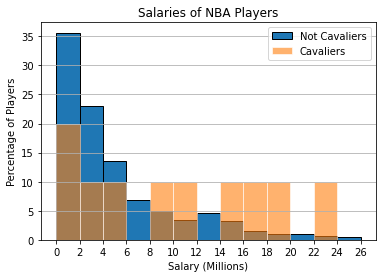

In [161]:
import matplotlib.pyplot as plt   #import a special graphing package

#These variables help us plot percentages (instead of counts) on the y-axis
n = len(cavs)
multipliers_cavs = np.ones(n)*100/n  

n = len(not_cavs)
multipliers_not_cavs = np.ones(n)*100/n  

#Ask Python to graph a histogram of the salaries
plt.hist(not_cavs["SALARY"], weights = multipliers_not_cavs, bins=np.arange(0, 28, 2), ec = 'black', label='Not Cavaliers')
plt.hist(cavs["SALARY"], weights = multipliers_cavs, alpha = 0.6, bins=np.arange(0, 28, 2), ec = 'white', label = 'Cavaliers')

#Set the x tick marks to match the bins used above.
plt.xticks(np.arange(0, 28, 2))

#Turn on the horizontal grid lines
plt.grid(axis = 'y')

#Show the legend
plt.legend()

#Give a title and label the axes
plt.title("Salaries of NBA Players")
plt.xlabel("Salary (Millions)")
plt.ylabel("Percentage of Players")

# Question 12

The histograms show that the Cavaliers seem to make more money than the other players, as the orange bars on the right are higher than the non-Cavalier players.  Also, the orange bars on the left are smaller, showing that a bulk of the non-Caveliers fall on the lower side.

A) What percentage of Cavaliers make less than 10 million?  What about those who are not a Cavalier?

Just eyeball and hardcode a guess by setting the variables below.

In [189]:
percentage_cavs_below_10_mil = cavs[cavs['SALARY'] < 10].count()
percentage_not_cavs_below_10_mil = not_cavs[not_cavs['SALARY'] <10].count()

percentage_cavs_below_10_mil, percentage_not_cavs_below_10_mil

(PLAYER      5
 POSITION    5
 TEAM        5
 SALARY      5
 dtype: int64,
 PLAYER      342
 POSITION    342
 TEAM        342
 SALARY      342
 dtype: int64)

B)  Let's use boolean indexing to check our guess.

In [191]:
#You can write more code here if needed

#Set these variables!  Split the cells if you want to see the value of num_cavs_below_10_mil printed out.
num_cavs_below_10_mil = len(cavs[cavs['SALARY'] < 10])
num_cavs_below_10_mil  

5

In [193]:
percent_cavs_below_10_mil  = num_cavs_below_10_mil/len(cavs)
100 * percent_cavs_below_10_mil

50.0

In [195]:
#You can write more code here if needed

#Set these variables!  Split the cell if you want to see the value of num_not_cavs_below_10_mil printed out.
num_not_cavs_below_10_mil = len(not_cavs[not_cavs['SALARY'] <10])
num_not_cavs_below_10_mil

342

In [197]:
percent_not_cavs_below_10_mil = num_not_cavs_below_10_mil/len(not_cavs)
100 * percent_not_cavs_below_10_mil

84.02948402948402

---

You're done!  Great job getting used to boolean indexing!